<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-18 20:23:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.3MB/s    in 3.3s    

2025-07-18 20:23:32 (60.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 187.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 208.6 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.1 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [9]:
import numpy as np

Text(0, 0.5, 'Frequency')

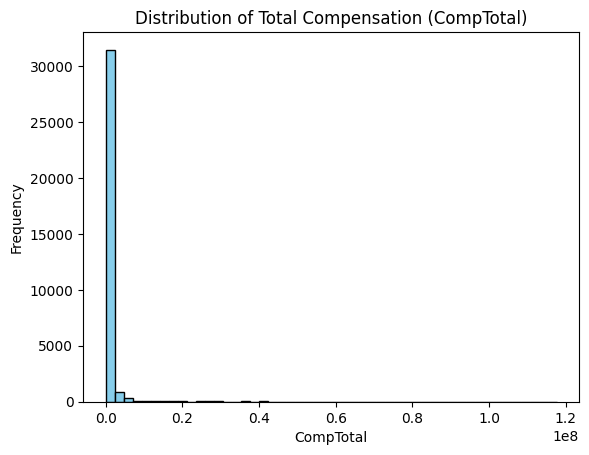

In [10]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
comp_total = df['CompTotal'].dropna()

upper_limit = np.percentile(comp_total, 99)
comp_total_capped = comp_total[comp_total <= upper_limit]

plt.hist(comp_total_capped, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Text(0, 0.5, 'Frequency')

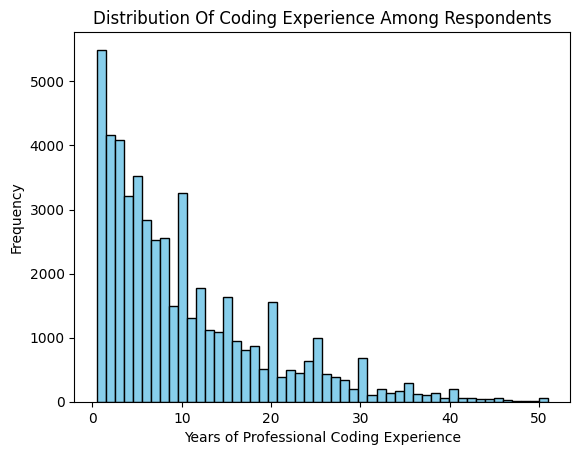

In [11]:
## Write your code here
QUERY = """
SELECT YearsCodePro
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0.5,'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.hist(df['YearsCodePro'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution Of Coding Experience Among Respondents')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


In [13]:
!pip install seaborn

In [14]:
import seaborn as sns

Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


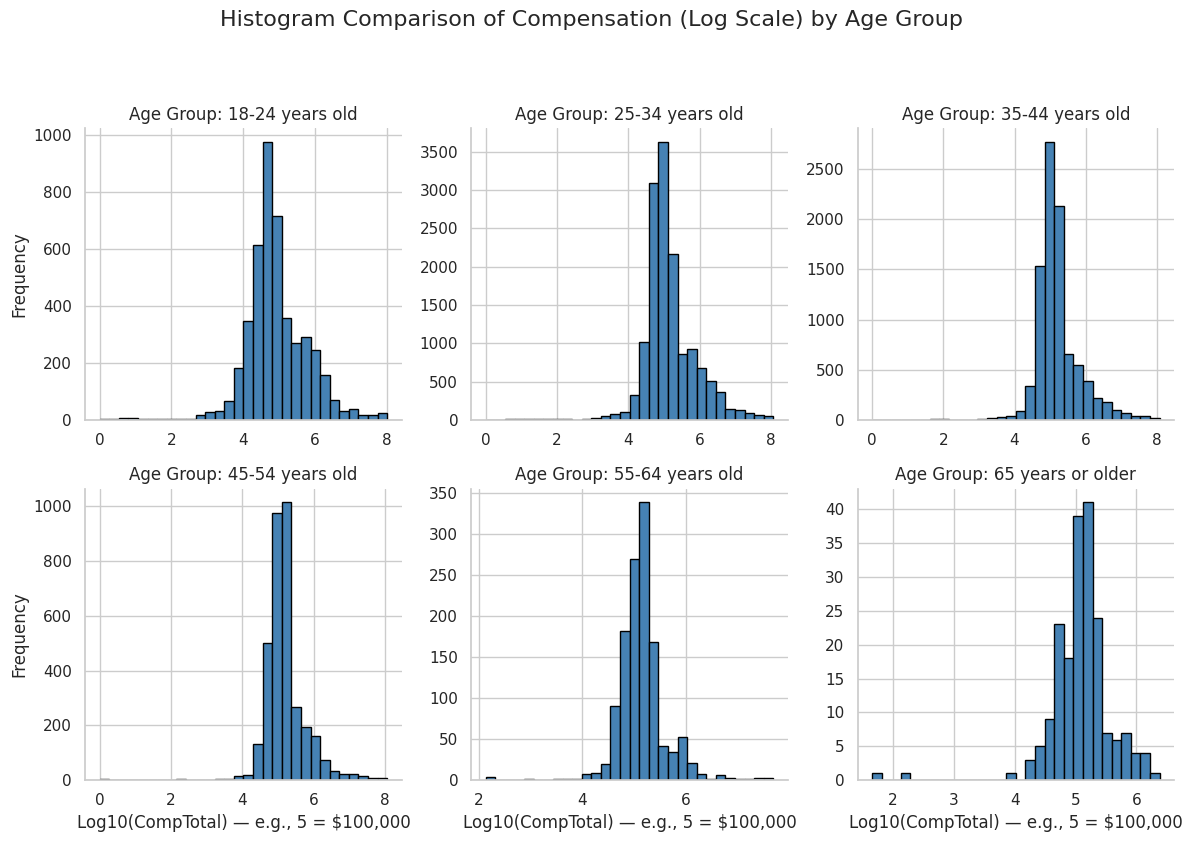

In [21]:
## Write your code here
QUERY = """
SELECT Age,CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

df = df.dropna(subset=['Age', 'CompTotal'])
df = df[df['CompTotal'] > 0]

cap = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < cap]
df['LogCompTotal'] = np.log10(df['CompTotal'])

age_bins = [
    'Under 18', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]

age_counts = df['Age'].value_counts()
valid_ages = age_counts[age_counts > 100].index
df = df[df['Age'].isin(valid_ages)]

sns.set(style='whitegrid')


g = sns.FacetGrid(df, col="Age", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(plt.hist, "LogCompTotal", bins=30, color="steelblue", edgecolor="black")

g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Log10(CompTotal) — e.g., 5 = $100,000", "Frequency")
plt.suptitle("Histogram Comparison of Compensation (Log Scale) by Age Group", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


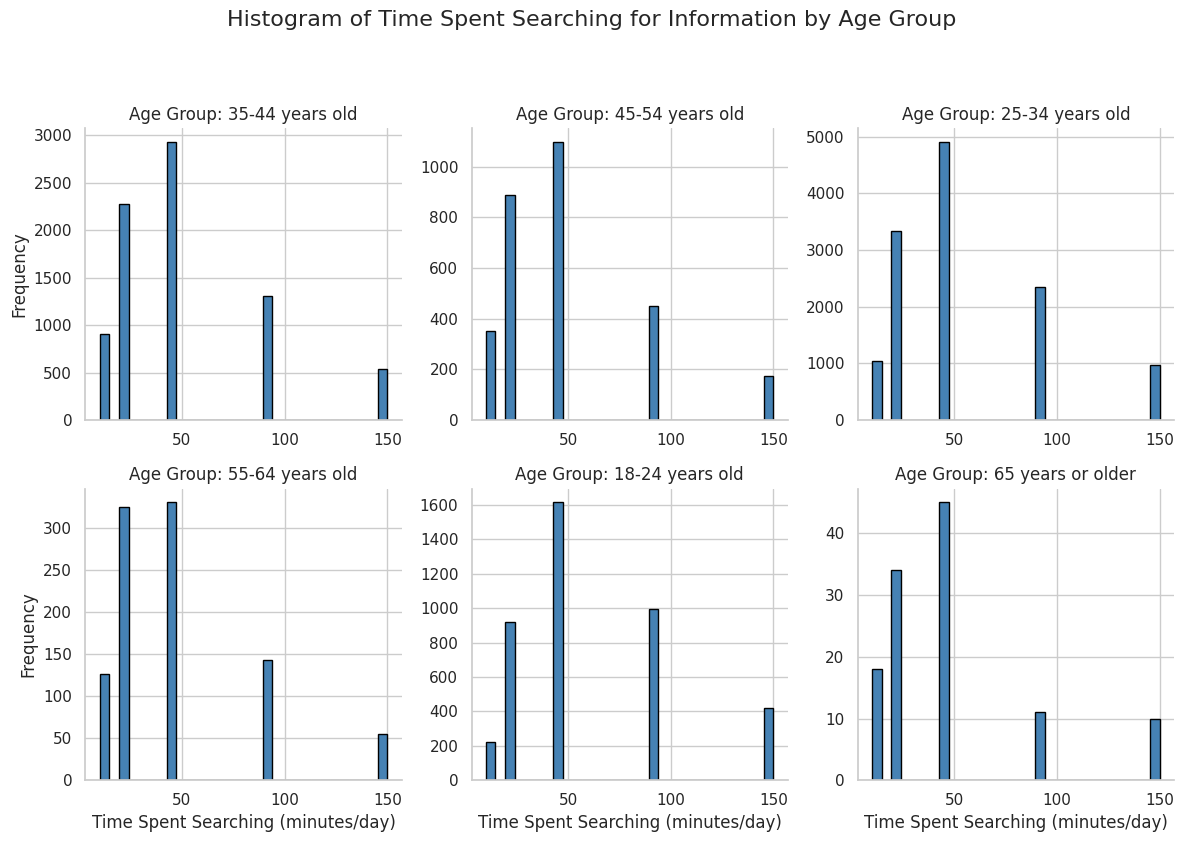

In [23]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df = df.dropna(subset=['Age', 'TimeSearchingNum'])

age_bins = [
    'Under 18', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(age_bins)]

sns.set(style='whitegrid')
g = sns.FacetGrid(df, col="Age", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(plt.hist, "TimeSearchingNum", bins=30, color="steelblue", edgecolor="black")
g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Time Spent Searching (minutes/day)", "Frequency")
plt.suptitle("Histogram of Time Spent Searching for Information by Age Group", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Text(0.5, 0, 'Databases')

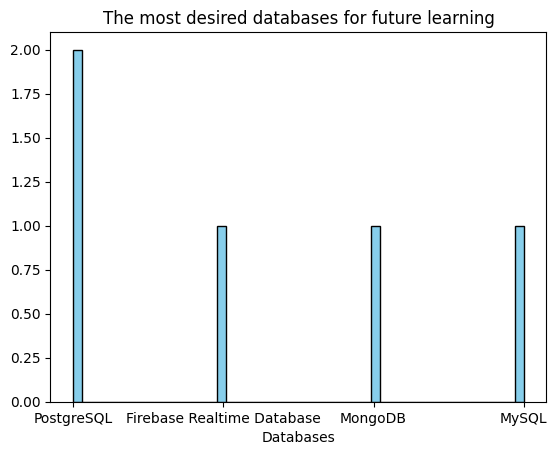

In [31]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df_want = df['DatabaseWantToWorkWith'].dropna().str.split(';')
df_want = df_want.explode().str.strip()
langwant_count = df_want.head(5)
plt.hist(langwant_count, bins=50, color='skyblue', edgecolor='black')
plt.title('The most desired databases for future learning')
plt.xlabel('Databases')

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_300/1558480084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Blues_r')


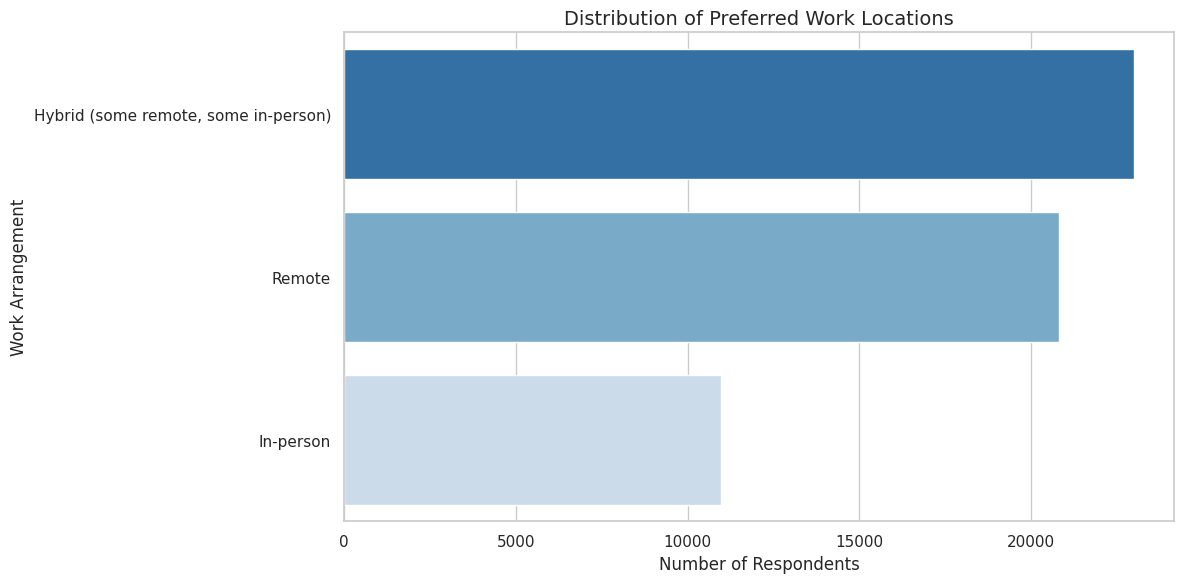

In [45]:
## Write your code here
QUERY = """
SELECT RemoteWork
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['RemoteWork'])


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Blues_r')
plt.title("Distribution of Preferred Work Locations", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Work Arrangement")
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


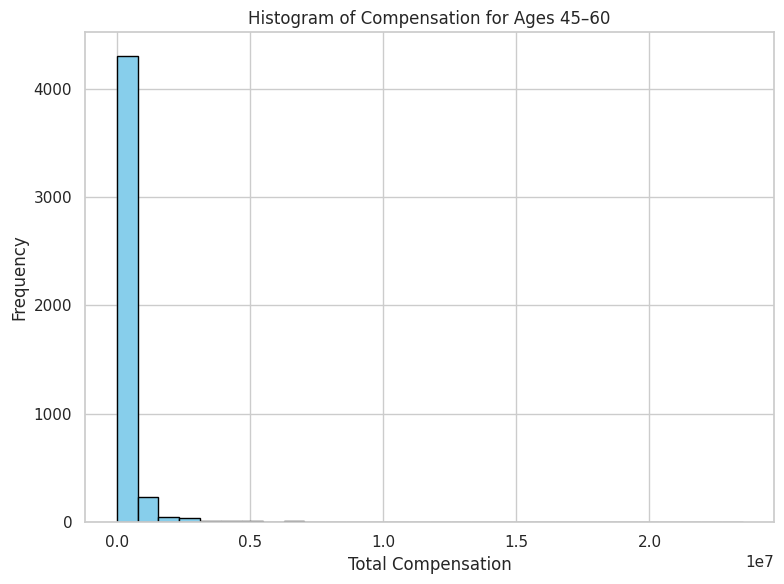

In [48]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query data
QUERY = """
SELECT CompTotal, Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Map age strings to numeric values
def map_age_to_numeric(age_str):
    if pd.isnull(age_str):
        return None
    elif age_str == 'Under 18 years old':
        return 15
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 30.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 67.5
    else:
        return None  

df['AgeNumeric'] = df['Age'].apply(map_age_to_numeric)

df_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

df_filtered = df_filtered.dropna(subset=['CompTotal'])
df_filtered = df_filtered[df_filtered['CompTotal'] > 0]

cap = df_filtered['CompTotal'].quantile(0.99)
df_filtered = df_filtered[df_filtered['CompTotal'] < cap]

plt.figure(figsize=(8, 6))
plt.hist(df_filtered['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Compensation for Ages 45–60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

def convert_years_code(value):
    if isinstance(value, str):
        value = value.strip()
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        try:
            return float(value)
        except:
            return None
    return value

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)
df = df.dropna(subset=['YearsCodePro'])

bins = [0, 2, 5, 10, 20, 50, 100]
labels = ['0–2', '3–5', '6–10', '11–20', '21–50',]()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
